# Fitting Thomson Scattering Spectrum

See Spectra_fitting_README.md for details

In [1]:
%matplotlib inline
import ts_analysis as TsA
import os

# s0808_18

### 1A: Load data and determine fibre positions on spectrometer CCD

In [2]:
folder=r"C:\Users\jdhare\Google Drive\MAGPIE\data\2018\s0808_18 C reconnection strong drive\s0808_18 TS"
shot_fn='sh/s0808_18 shot.asc'
bk_fn='bk/s0808_18 hipower thru chamber.asc'
ts=TsA.TS_Analysis(folder, shot_fn,[bk_fn])
#spacing 17.8, offset 8

ts.find_fibre_edges()

A Jupyter Widget

### 1B: Specify fibre angles and split CCD into separate fibres

In [3]:
'''Split image into fibres'''
ts.split_into_fibres(discard_rows=0)
ts.zero_fibres(upper=1150, lower=850)
a_angle=[45]*14 #here we have fibres 1A through 14A at an angle of 45'
b_angle=[135]*14
ts.pair_fibres(a_angle,b_angle)

### 2: Fit spectra
- Specify the fibre to fit using Fnum (1-14) and Fset (A or B)

- Leave the model as 'nLTE', no other models are currently implemented.

- Specify the plasma parameters in the form (Values, Independent?, Minimum value)

- If Independent is True, then the value is fixed and minimum has no meaning. If Independent is False, then the value is an initial guess for the fit and minimum is either a float, or simply ommitted to specify no given minimum.

- Leave A in brackets, eg 'A':  ((12), True). The code will find the relevant nLTE data for Z, T_e and decompose ZT_e into Z and T_e separately.

Once you've fitted the data, the code will remember the fit parameters it used, and instead of refitting you can simply plot or export the data using the next cells.

[[Model]]
    Model(Skw_nLTE_stray_light_convolve)
[[Fit Statistics]]
    # function evals   = 66
    # data points      = 296
    # variables        = 6
    chi-square         = 11495078.035
    reduced chi-square = 39638.200
    Akaike info crit   = 3139.853
    Bayesian info crit = 3161.995
[[Variables]]
    T_e:         69.6263892 +/- 1.613918 (2.32%) (init= 100)
    T_i:         289.587740 +/- 5.956554 (2.06%) (init= 150)
    V_fi:       -2936.30586 +/- 375.3380 (12.78%) (init= 0)
    stray:       4018.84827 +/- 181.6294 (4.52%) (init= 0.1)
    amplitude:   9826.45431 +/- 58.26821 (0.59%) (init= 10000)
    offset:      84.7892102 +/- 12.65715 (14.93%) (init= 120)
[[Correlations]] (unreported correlations are <  0.100)
    C(T_e, stray)                =  0.639 
    C(stray, amplitude)          = -0.627 
    C(T_e, T_i)                  = -0.582 
    C(T_e, amplitude)            = -0.479 
    C(T_i, stray)                = -0.427 
    C(amplitude, offset)         = -0.208 
    C(T_i

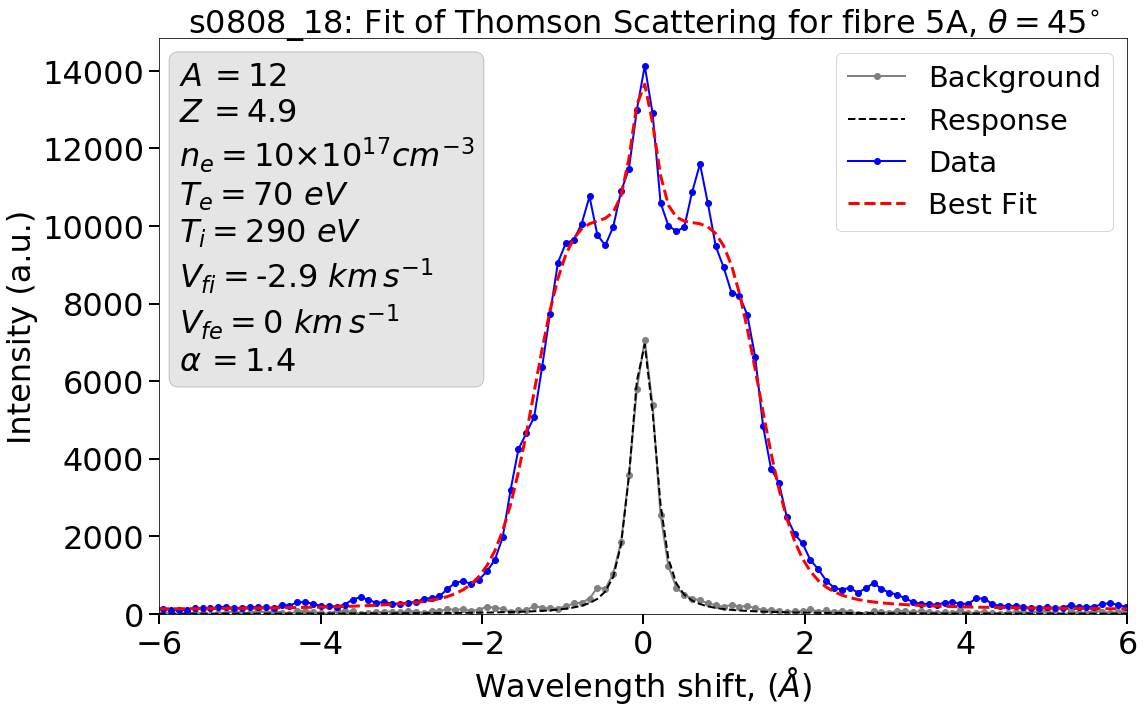

In [4]:
Fnum=5
Fset='A'

plasma_parameters={ 'model': 'nLTE',
                    'n_e': (1e18,True),#in cm^-3, must be specified
                    'T_e': (100, False,1),#In electron volts. 
                    'V_fe':(0, True),#m/s.
                    'A':  ((12), True),#in nucleon masses, must be specified
                    'T_i': (150, False,1),#In electron volts.
                    'V_fi':(0, False),#m/s.
                    'stray':(0.1, False,0), #Fraction of signal made up of stray light. >0, <1.0!!
                    'amplitude': (10000, False), #Fraction of signal made up of spectrum.
                    'offset': (120, False), #
                    'shift': (0, True)
                    }

'''This code fits and plots the result'''
f=ts.select_fibre(Fnum,Fset)
f.voigt_response()
f.symmetric_crop_around_l0()
f.fit_fibre(plasma_parameters)
f.calculate_alpha()
ts.pretty_plot(Fnum,Fset, tm=1.6, sr=6) #you can change the angstrom range plotted by altering 'sr=' here.
print(f.skw_res.fit_report()) #this prints the fitted values and the fit quality

### 3A: Plot data
If you've already fitted a fibre and simply want to see the fit again without refitting, use the cell below. You can then save the figure using the next cell. You can change the range of the horizontal access by altering sr=, which is in Angstroms

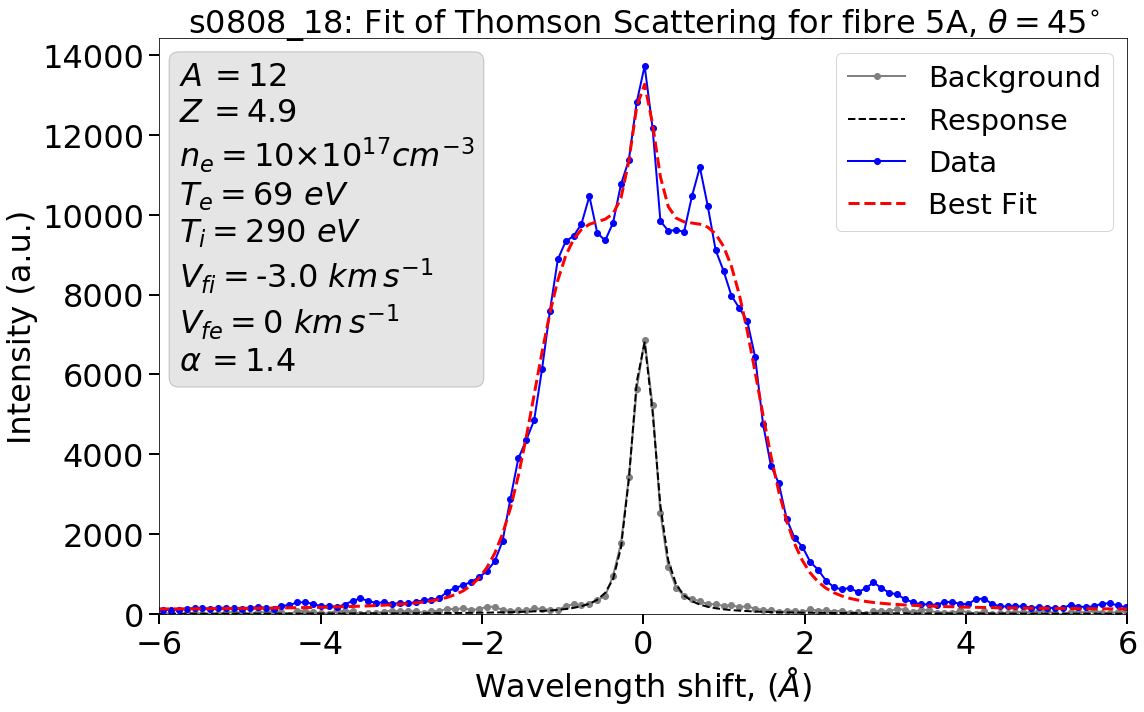

In [24]:
ts.pretty_plot(Fnum=1,Fset='A', tm=1.6, sr=6)

### 3B: Save plot
This saves whichever figure you have generated last, either by fitting (2) or using the plot data cell (3A) above. You can alter the filename

In [28]:
ts.fig.savefig(ts.s_name+' fibre '+str(Fnum)+Fset+'.png')

### 4: Export data
Save out the fits so you can plot them in another plotting program. Specify the fibre number and the fibre set.

In [15]:
Fnum=1
Fset='A'
f.export_data(ts.s_name+' '+str(Fnum)+Fset)

### 5A: Plot all the A fibre data

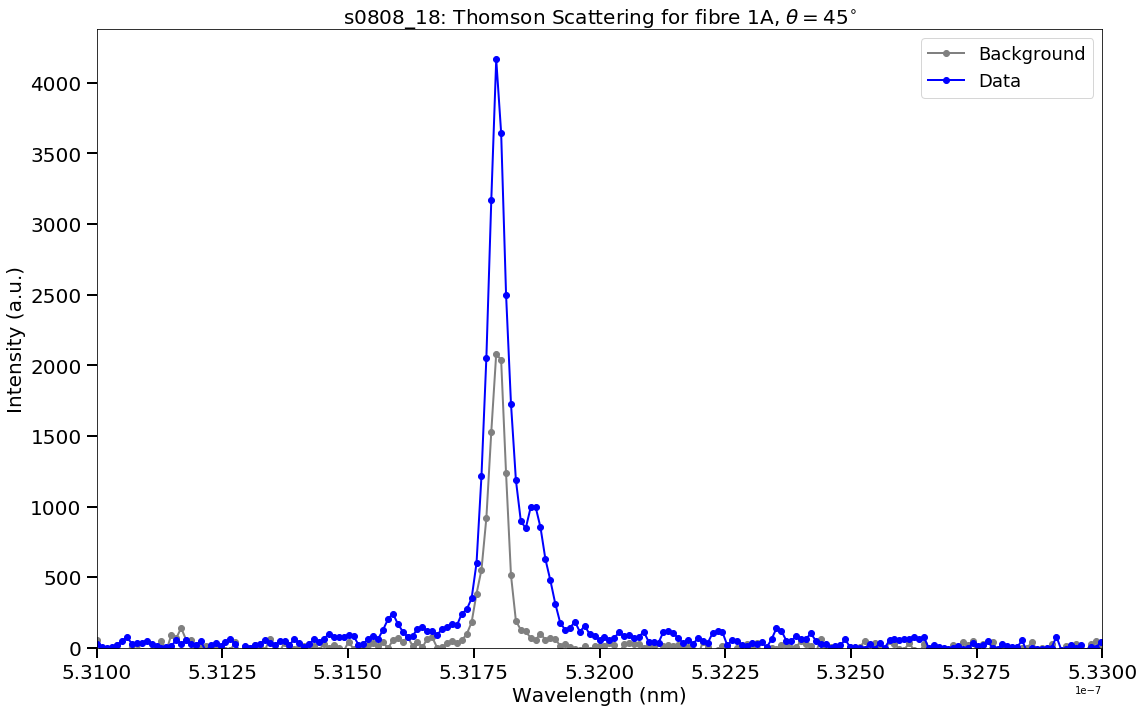

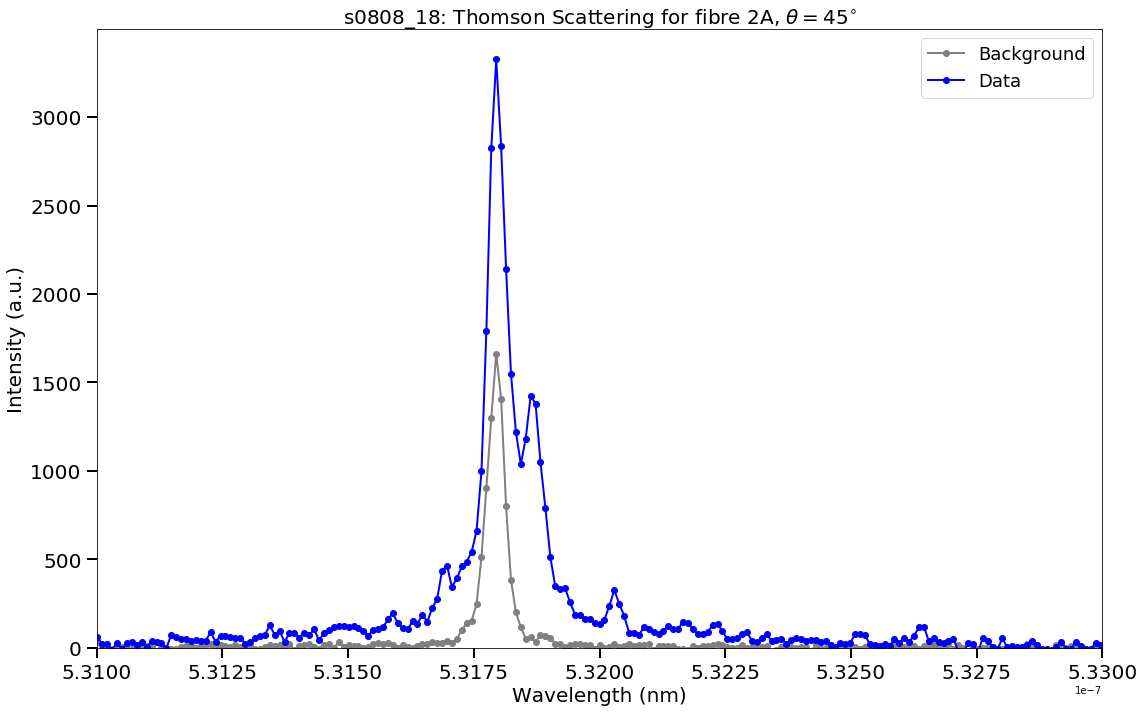

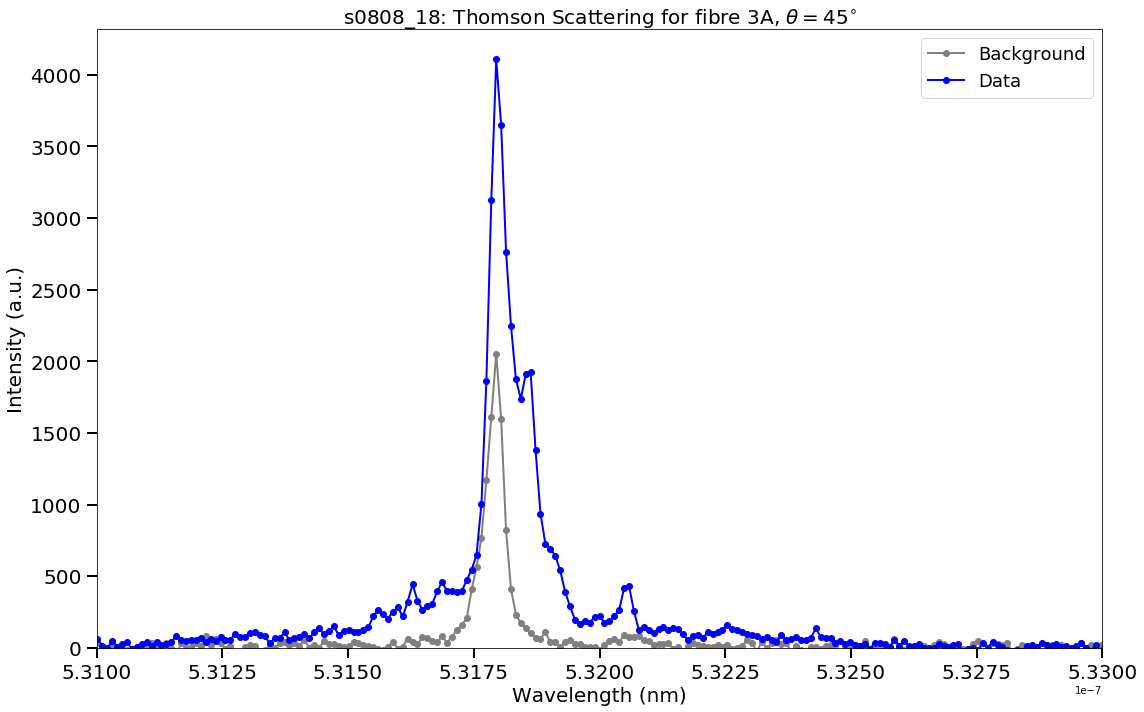

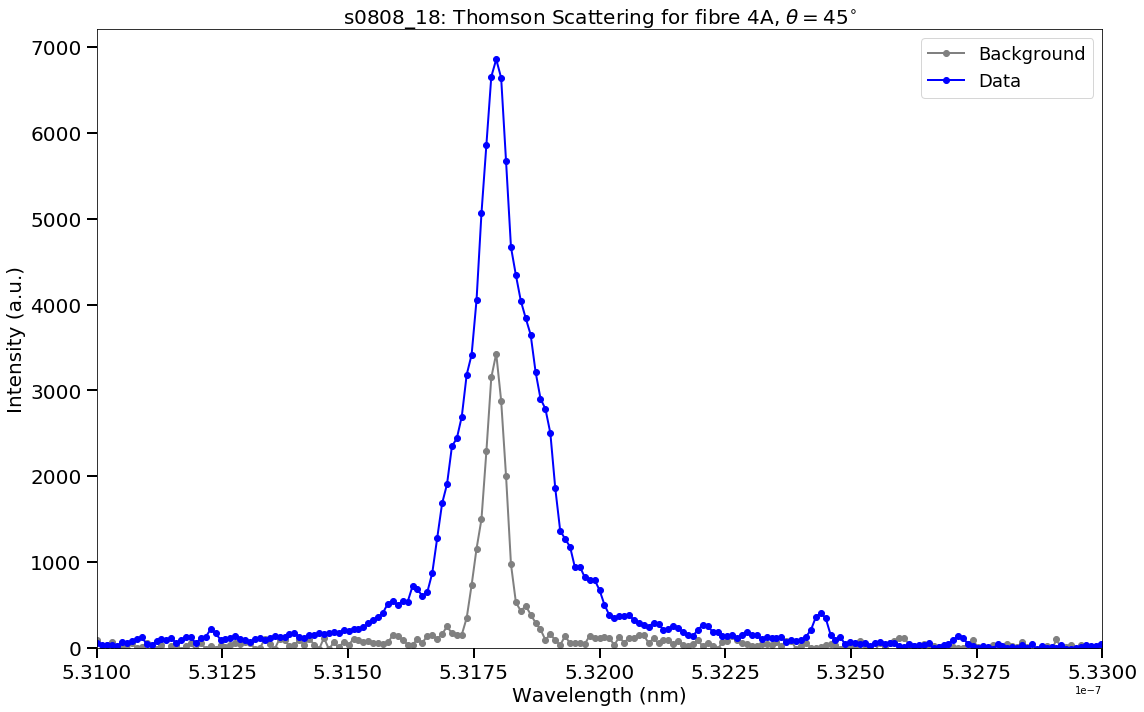

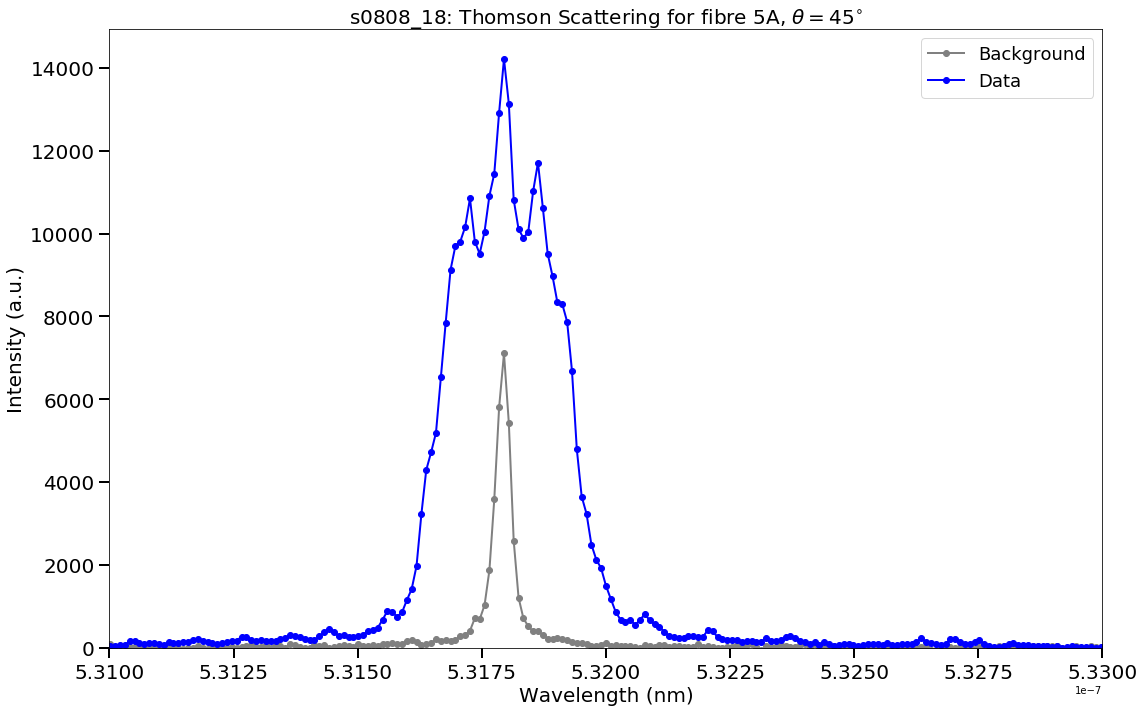

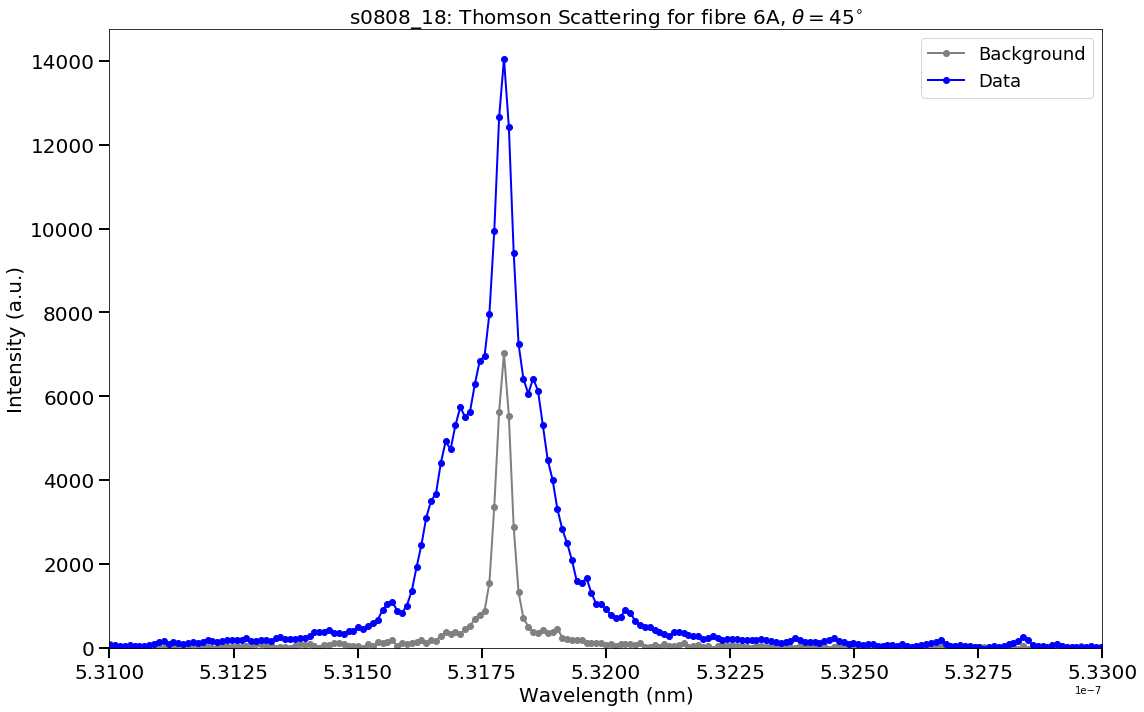

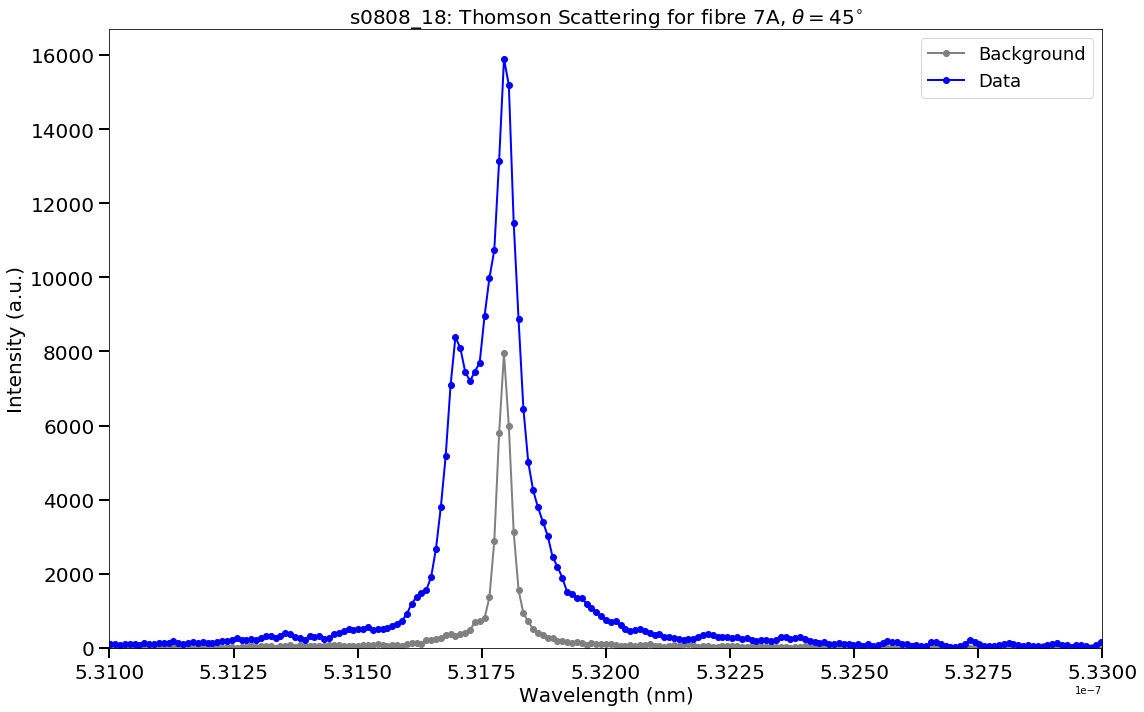

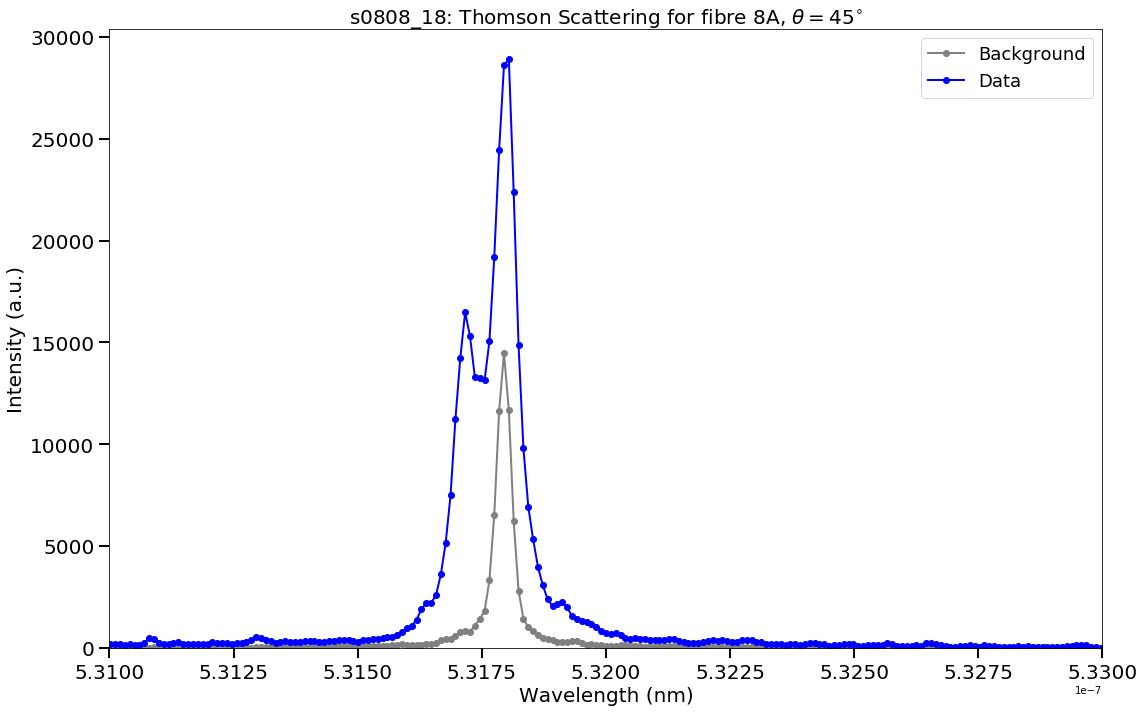

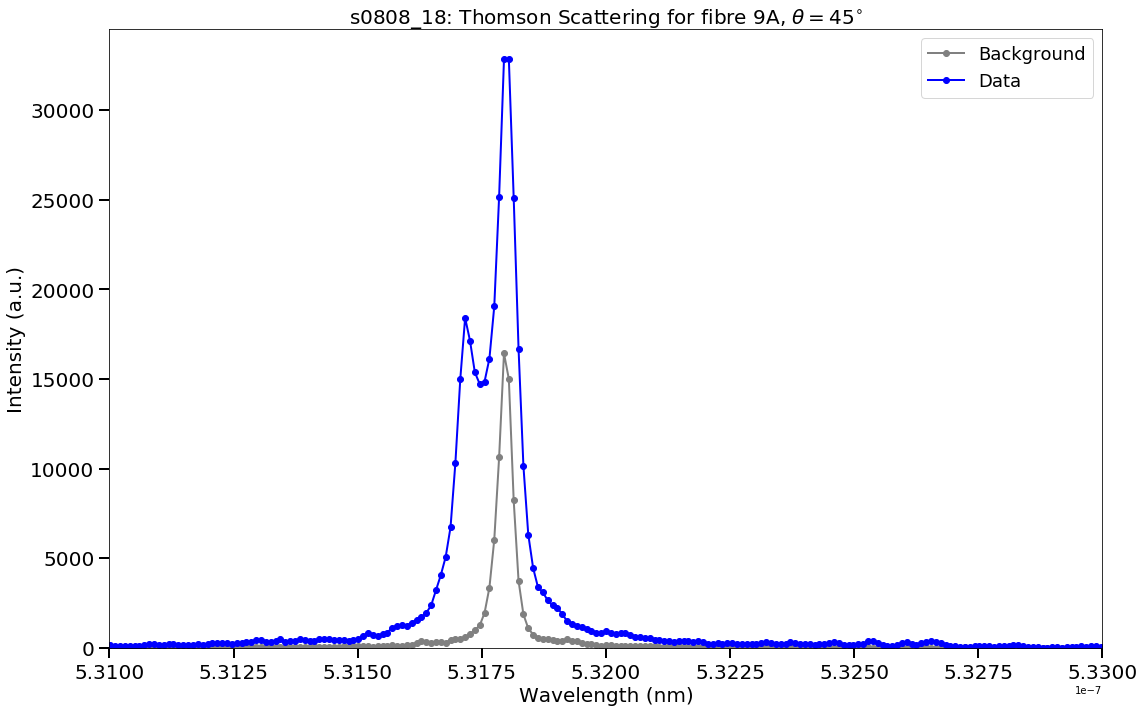

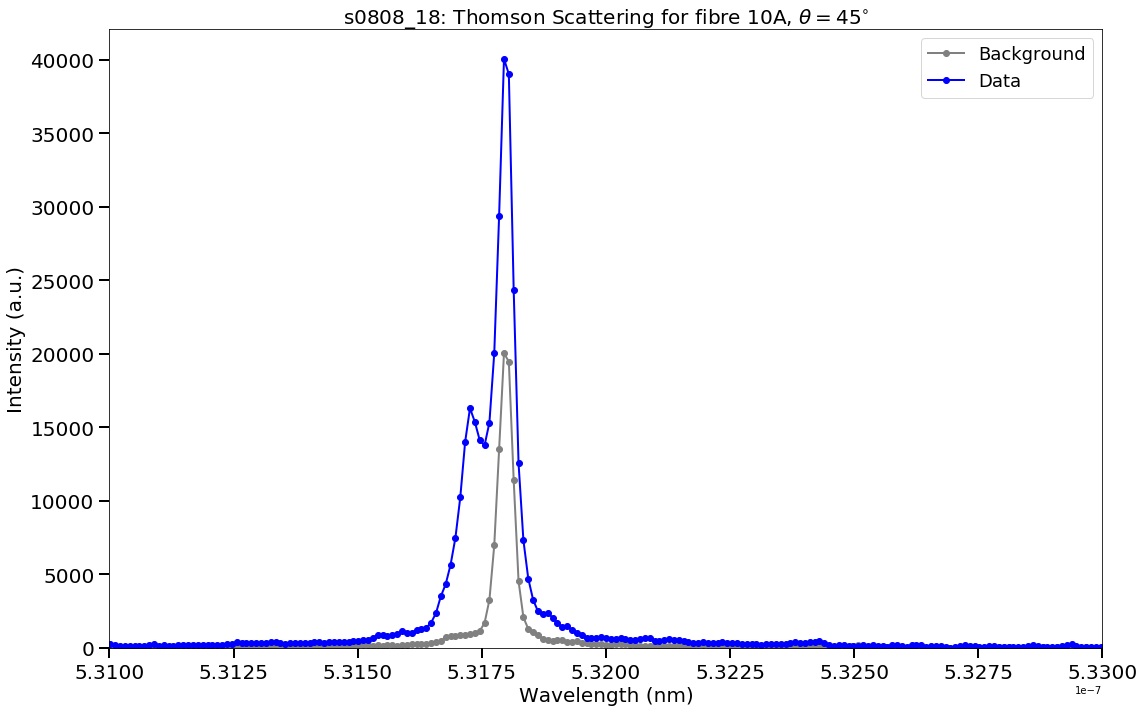

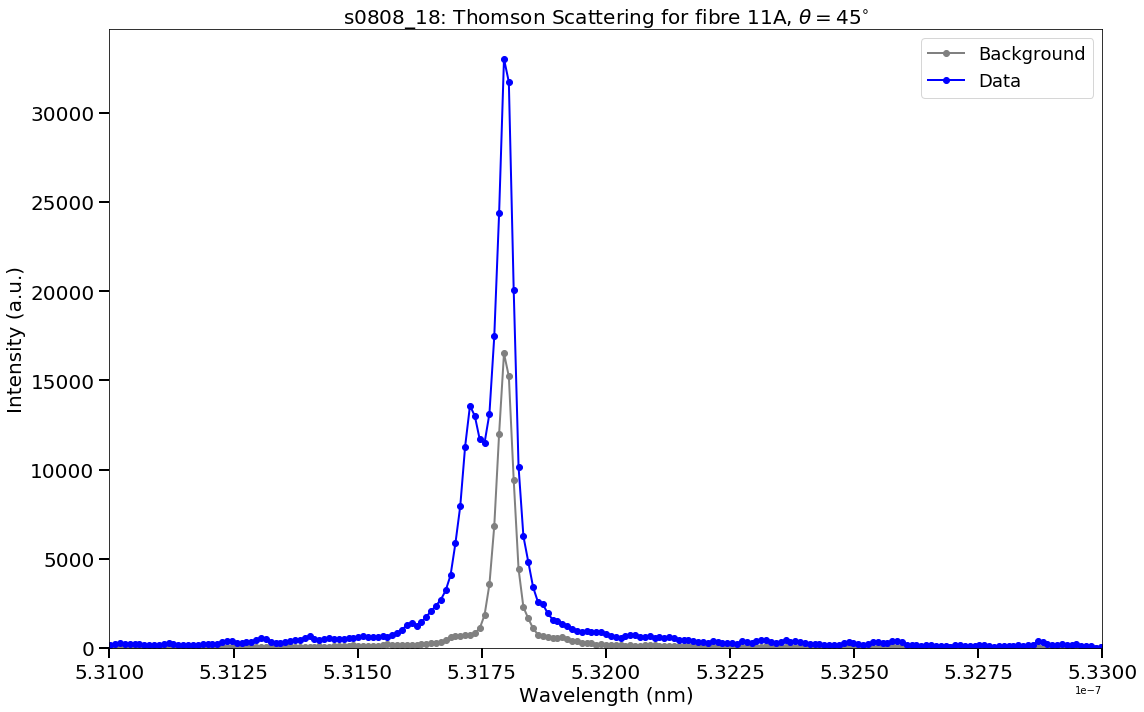

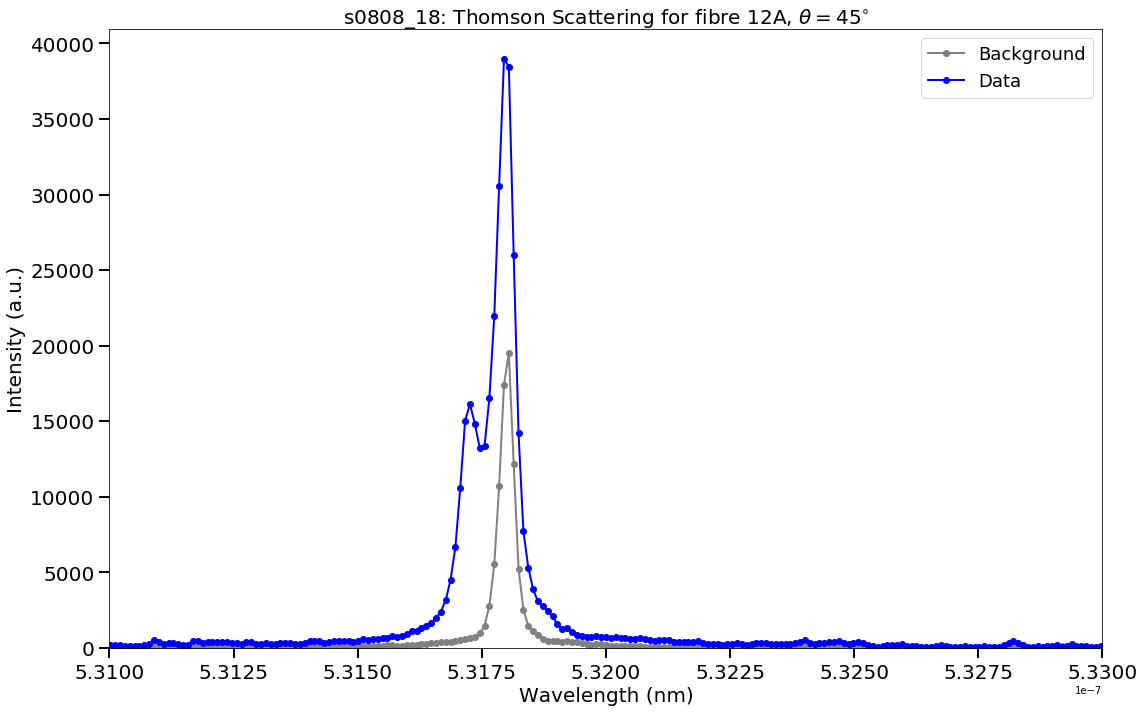

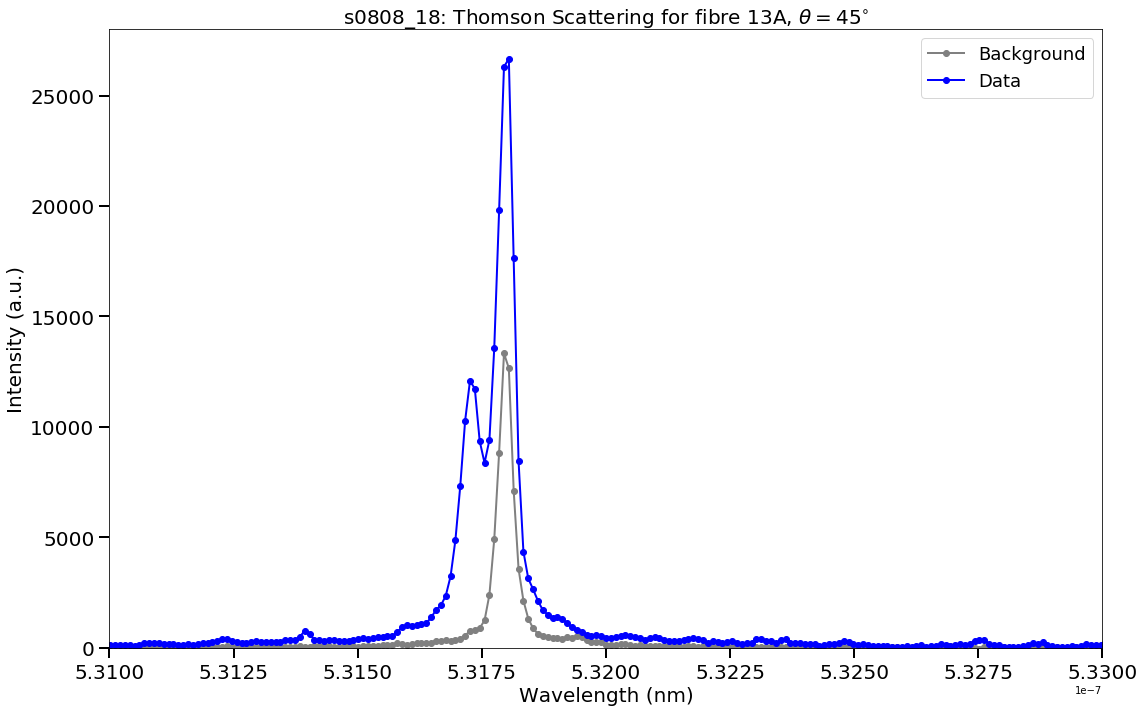

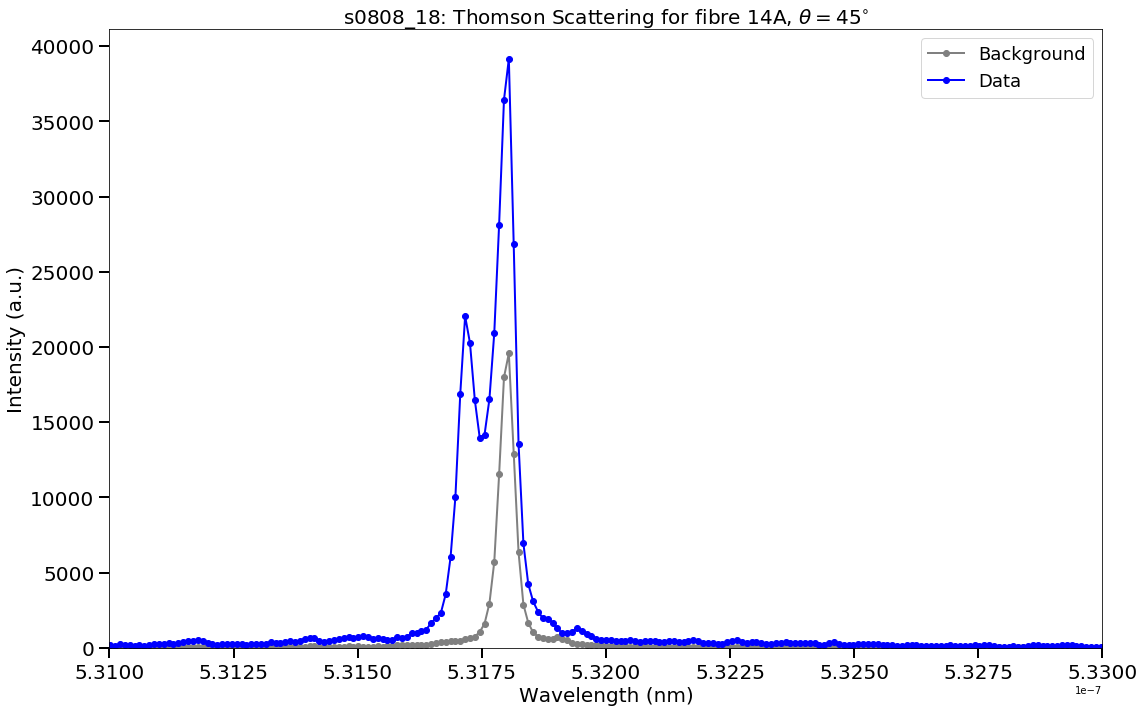

In [9]:
for i in range(1,15):
    ts.plot_data(Fnum=i, Fset='A')

### 5B: Plot all the B fibre data

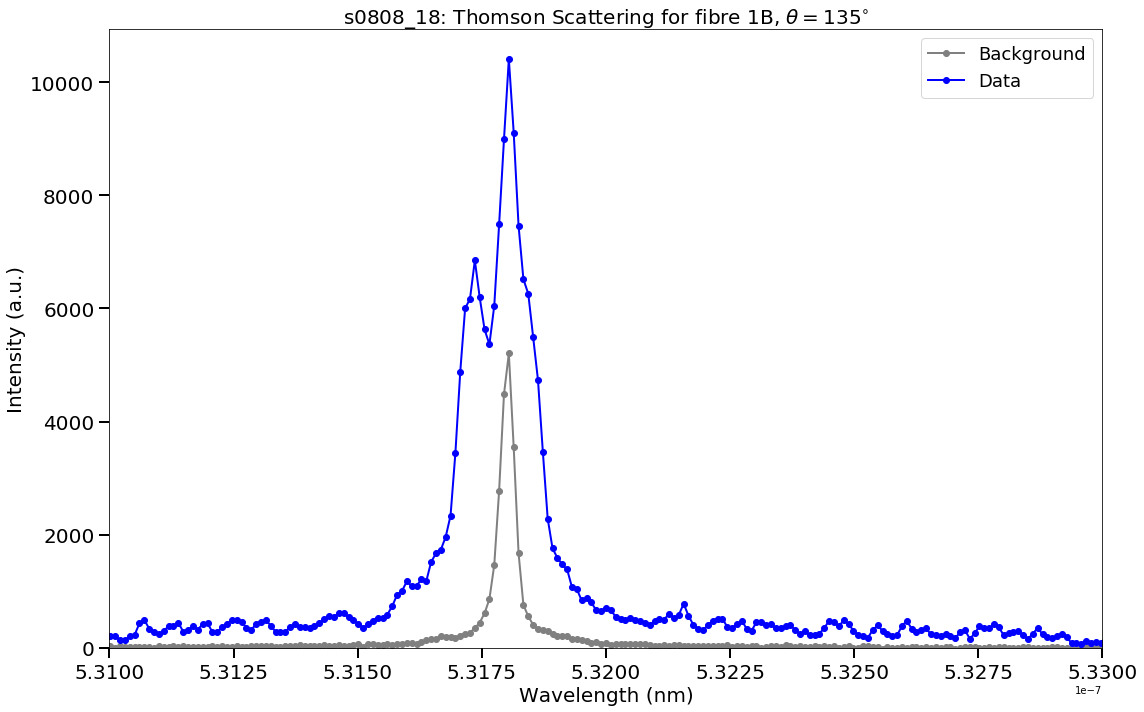

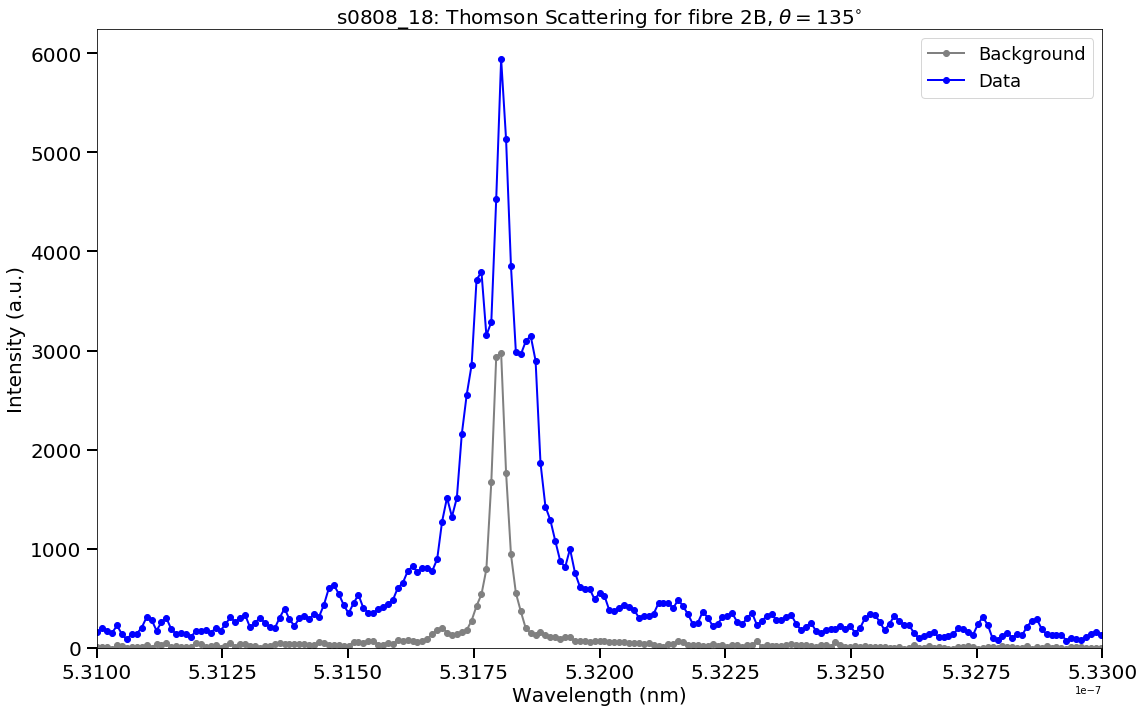

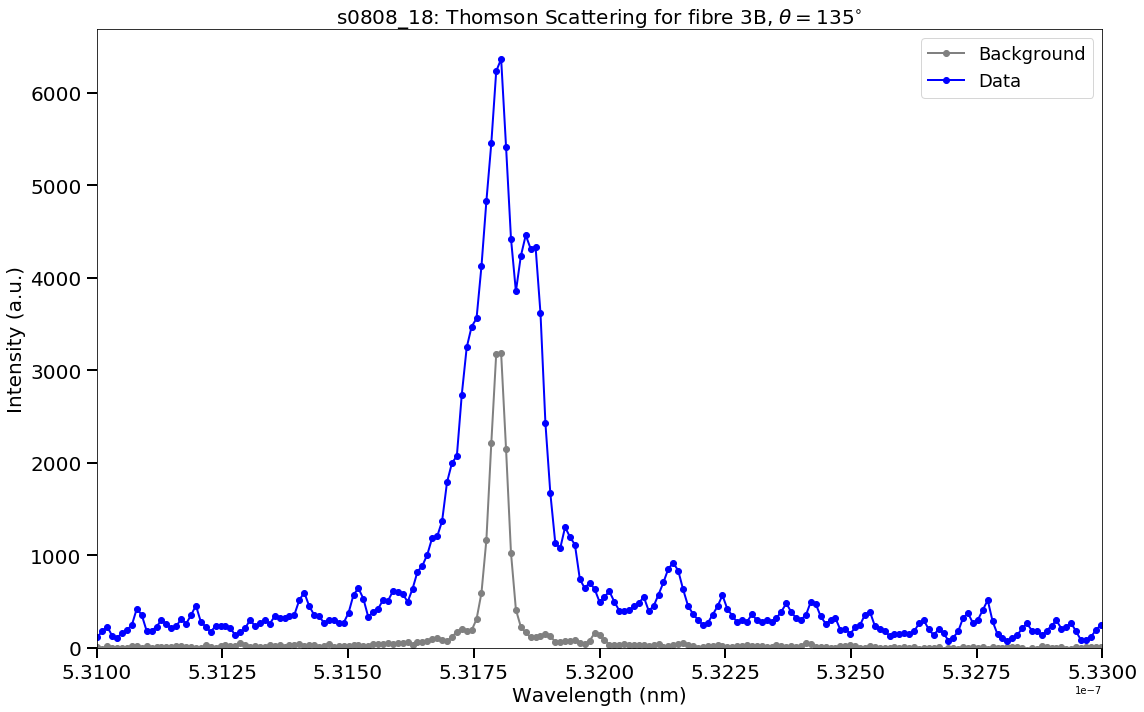

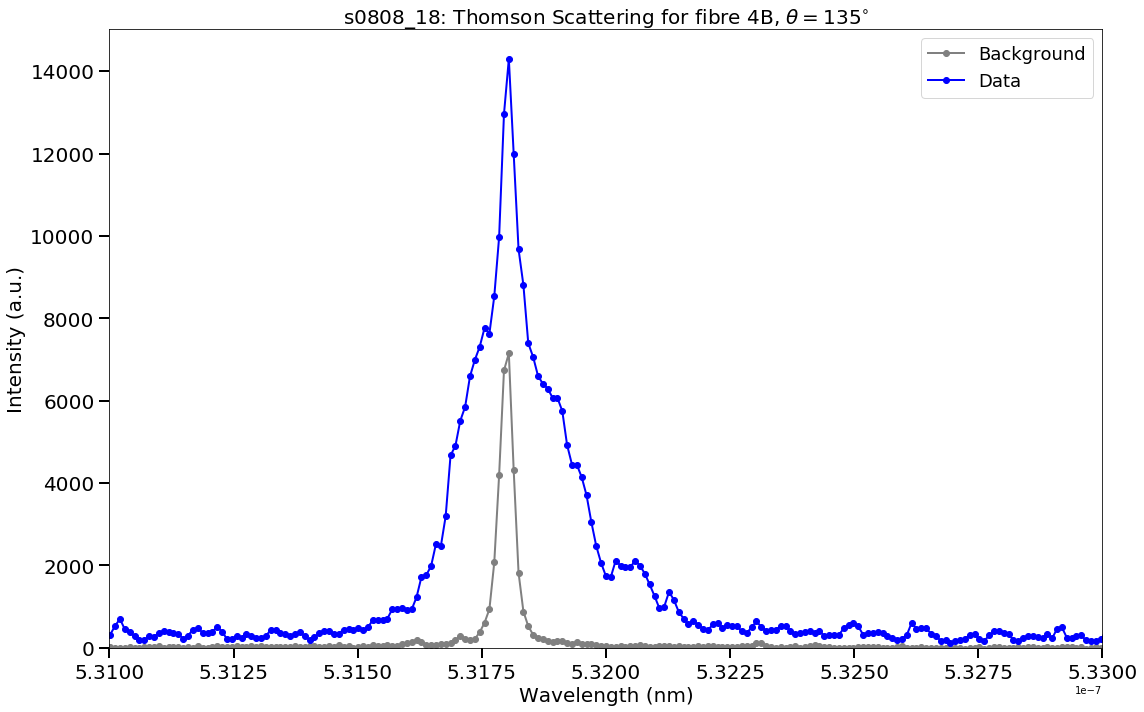

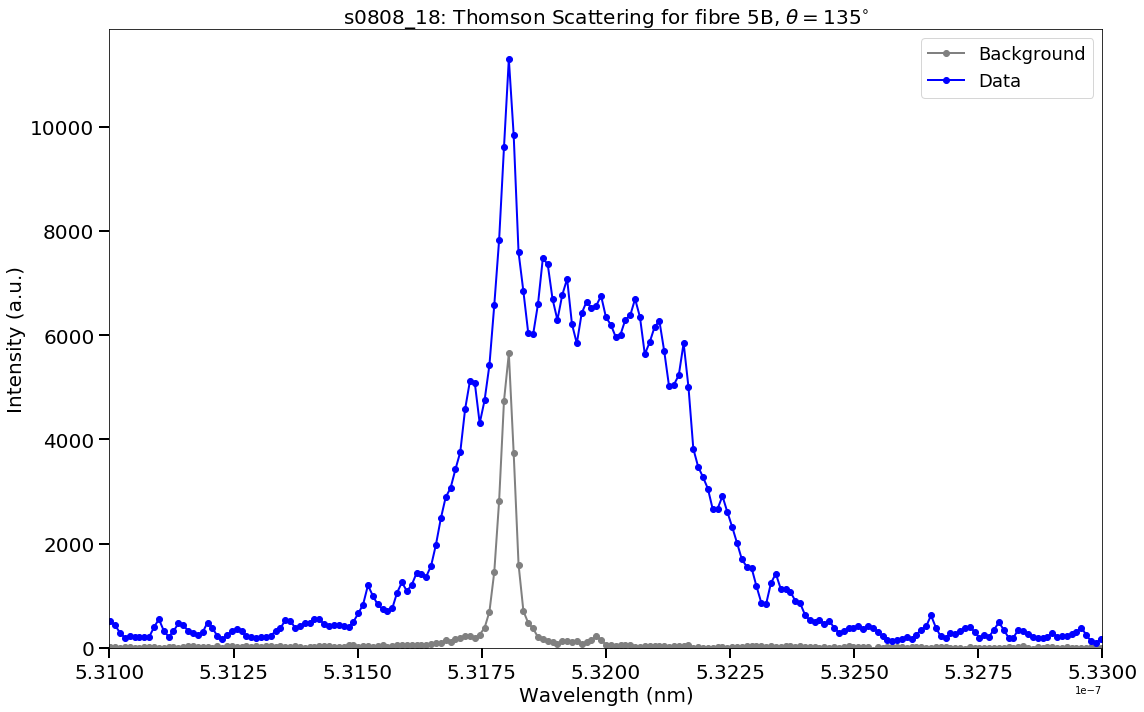

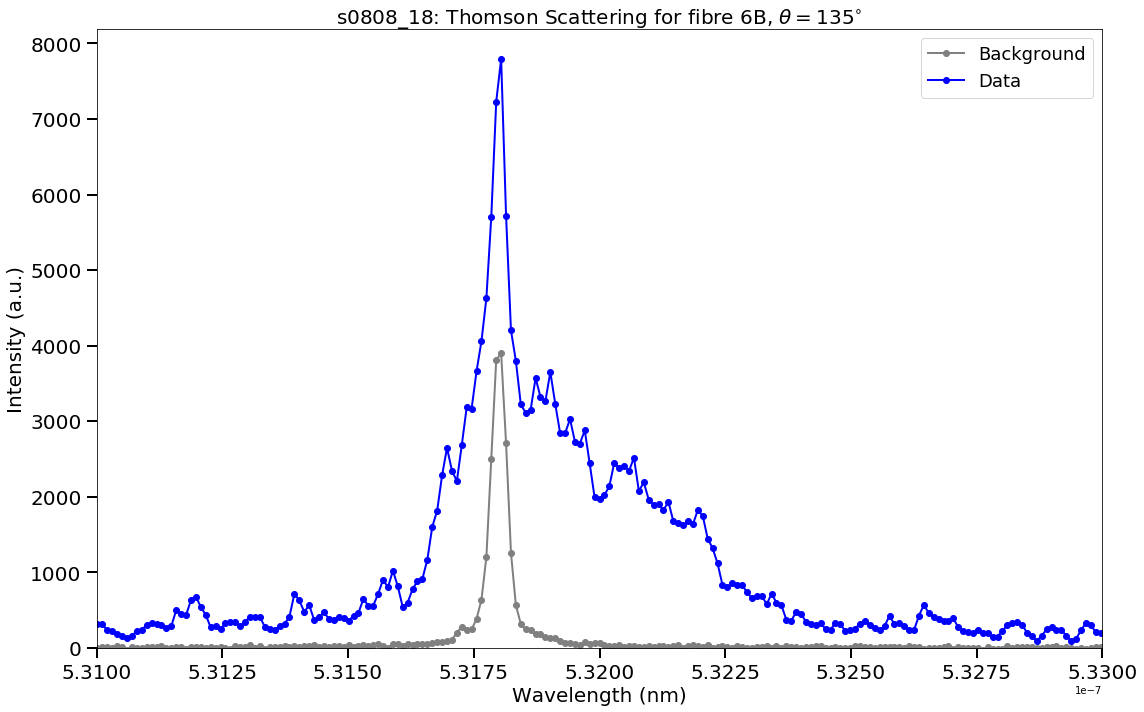

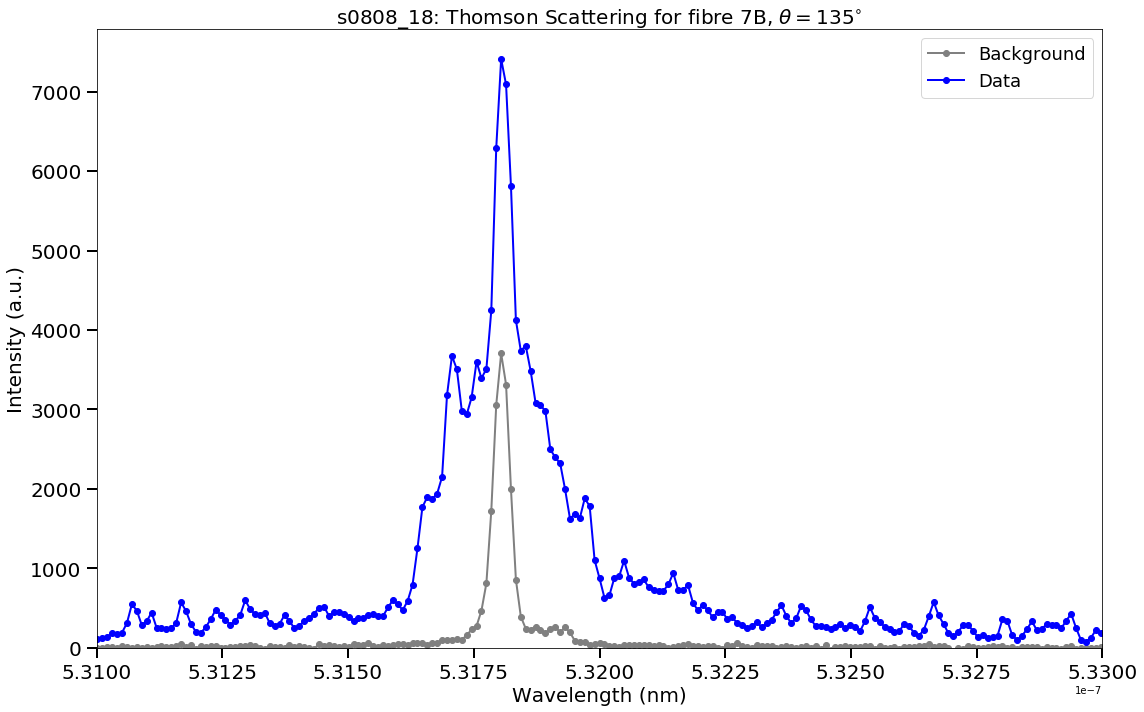

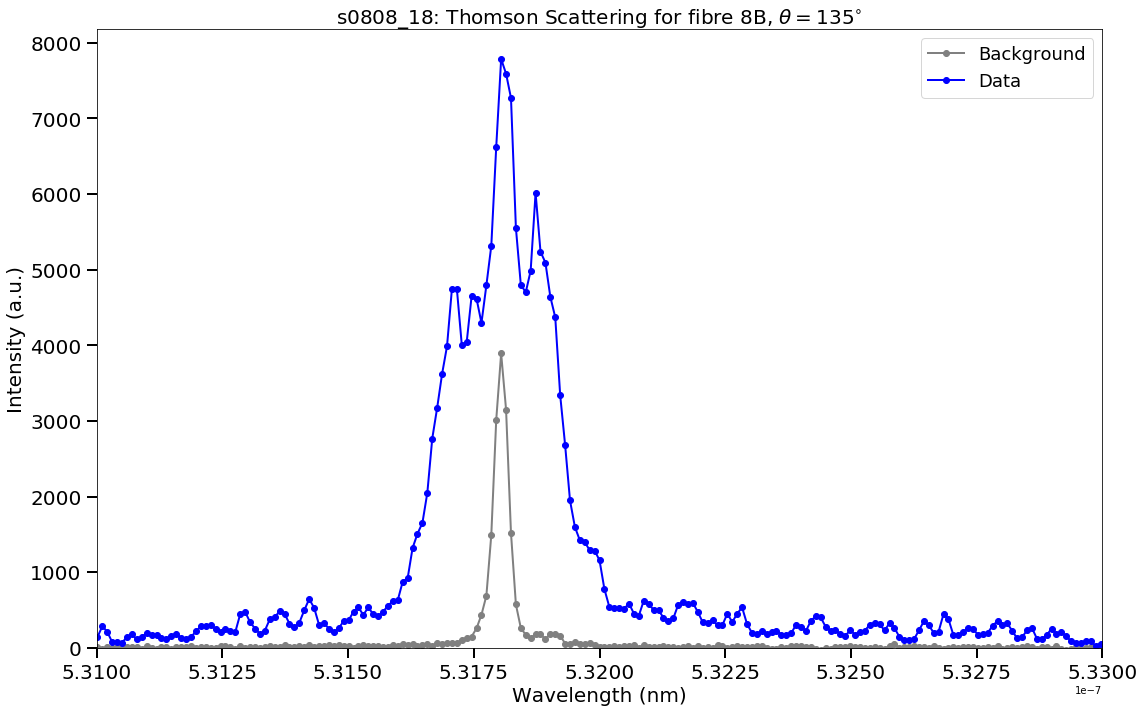

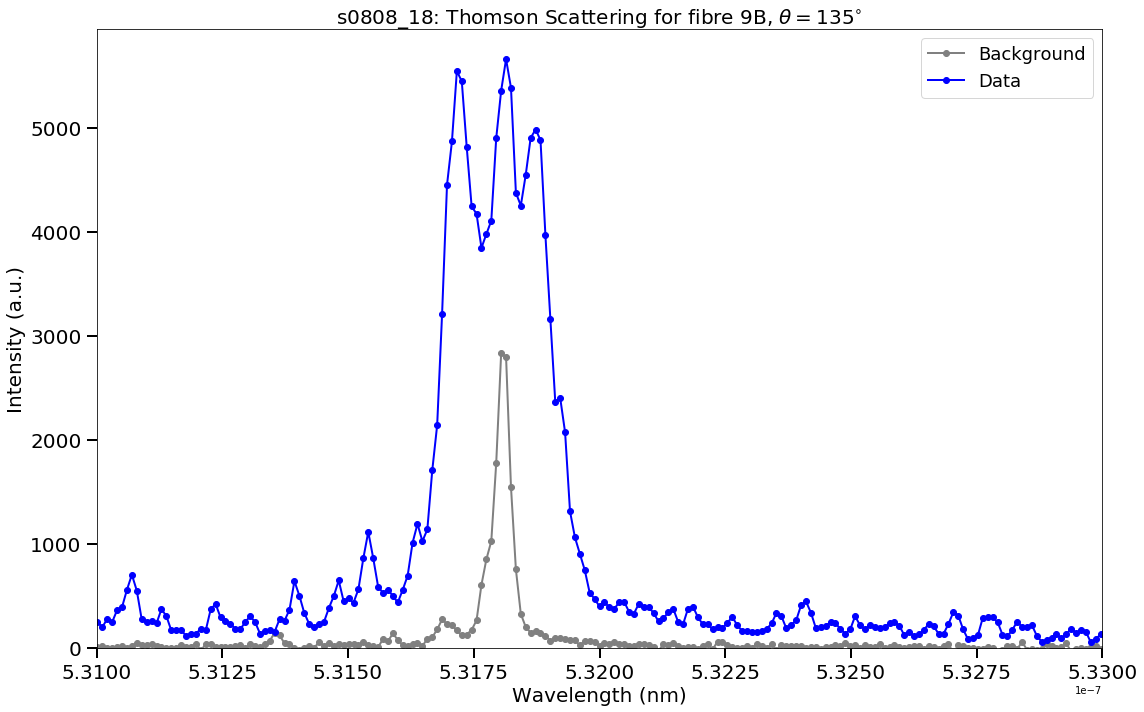

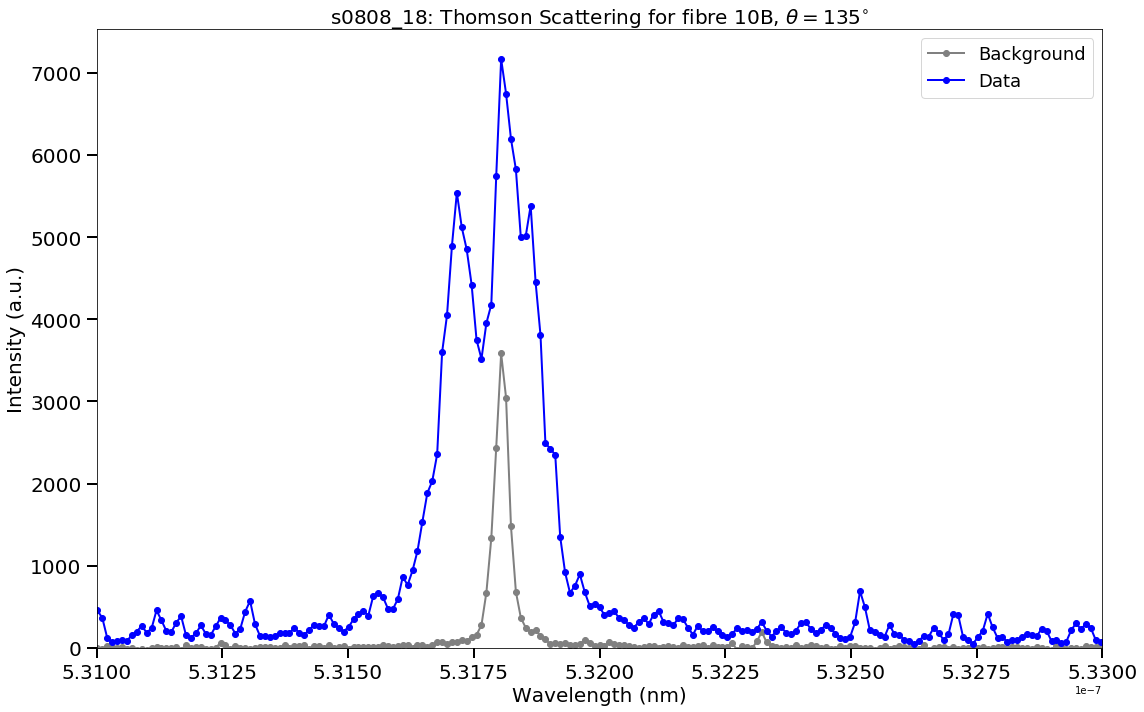

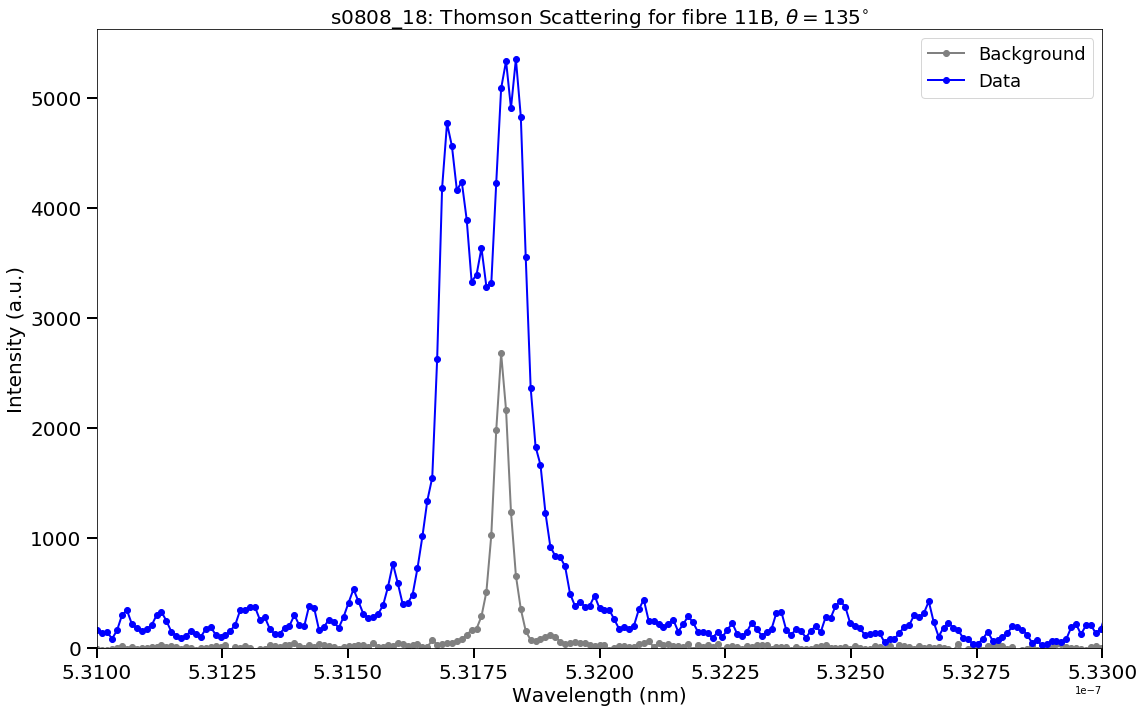

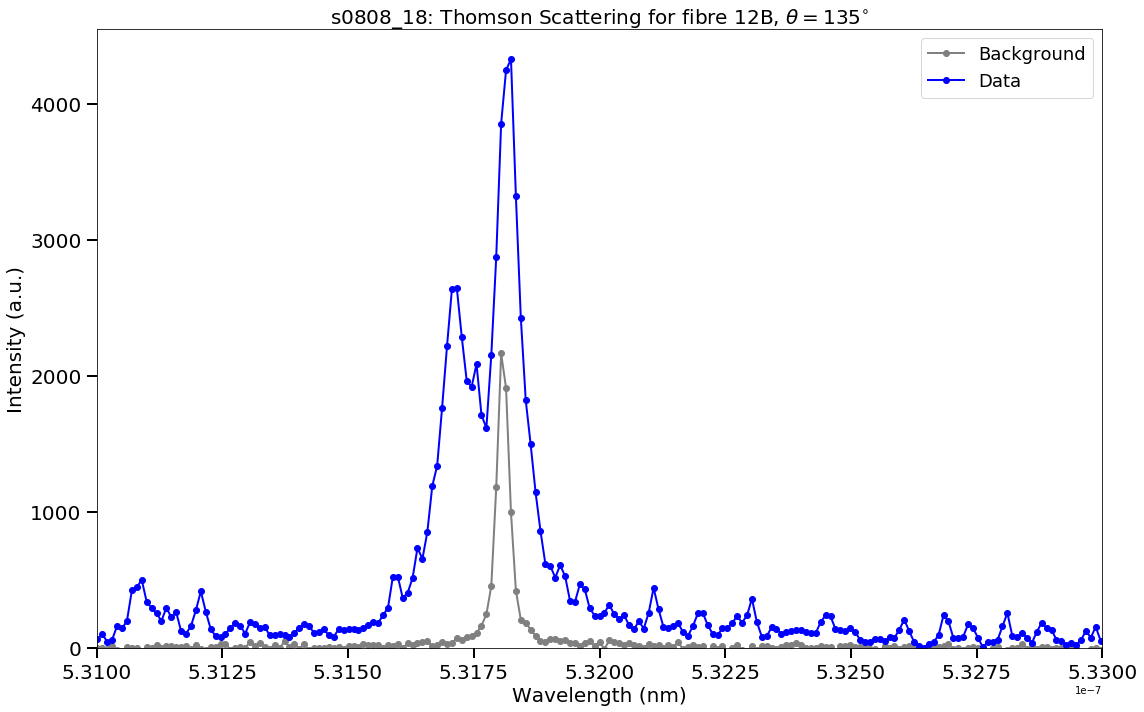

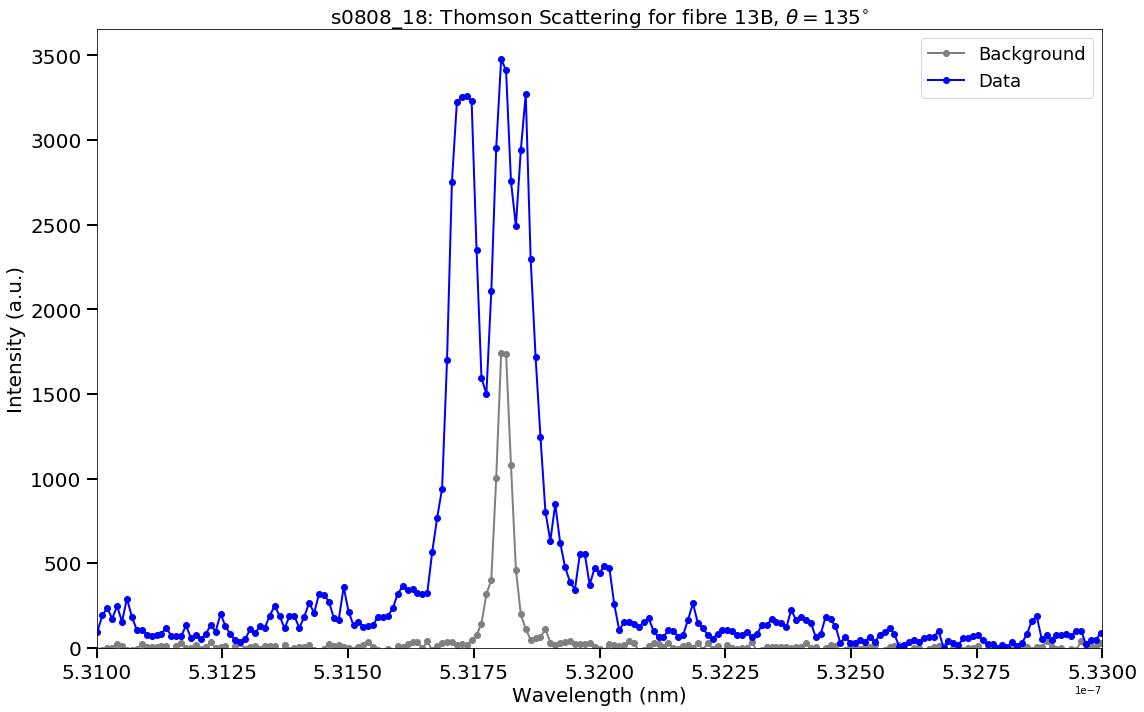

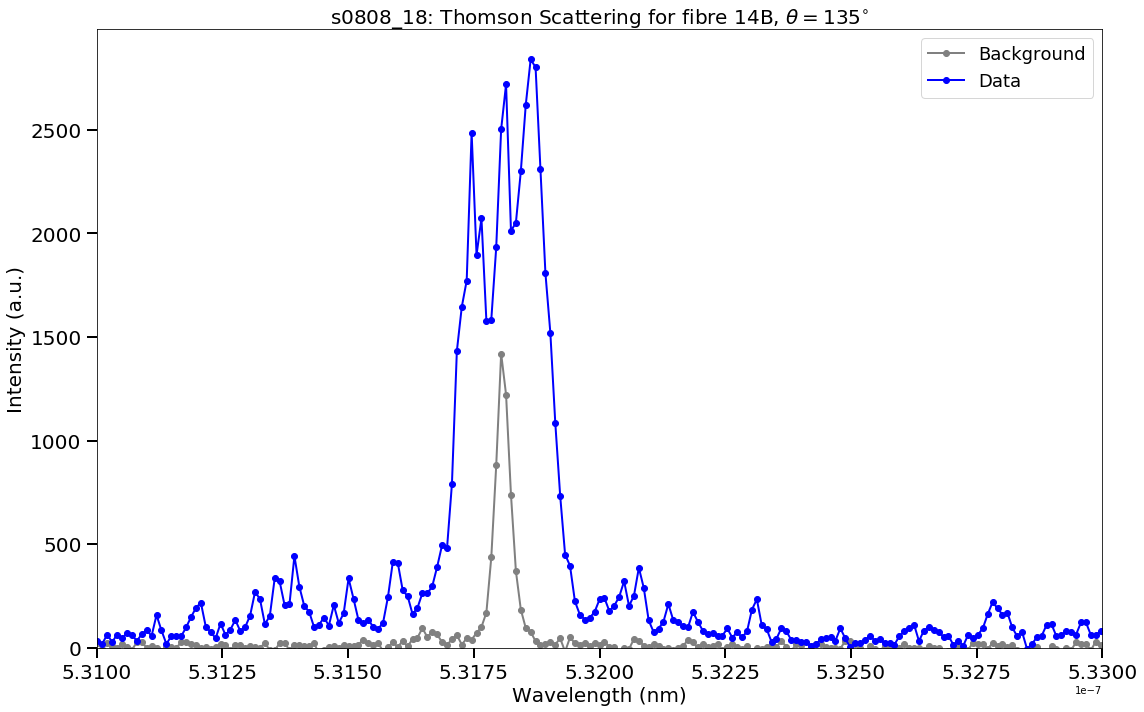

In [26]:
for i in range(1,15):
    ts.plot_data(Fnum=i, Fset='B')